## Lectura 5-1: Inferencia en RLS




Esta lectura continúa nuestro tratamiento del modelo de regresión lineal simple. En las siguientes subsecciones se analiza cómo podemos utilizar nuestros conocimientos sobre la distribución muestral del estimador OLS para hacer afirmaciones sobre su incertidumbre.

Estas subsecciones cubren los siguientes temas:

- Pruebas de hipótesis relativas a los coeficientes de regresión.

- Intervalos de confianza para coeficientes de regresión.

- Regresión cuando $X$ es una variable categórica.

- Heteroscedasticidad y homoscedasticidad.



## Pruebas de hipótesis de dos caras sobre el coeficiente de pendiente

Utilizando el hecho de que $\hat{\beta}_1$ se distribuye aproximadamente de forma normal en muestras grandes, la prueba de hipótesis sobre el verdadero valor $\beta_1$ se puede hacer como ya hicimos.



### Forma general del $t$-estadístico

Recuerde de las clases de Inferencia que un estadístico general $t$ tiene la forma

$$ t = \frac{\text{estimated value} - \text{hypothesized value}}{\text{standard error of the estimator}}.$$





## Comprobación de hipótesis sobre $\beta_1$.

Para probar la hipótesis $H_0: \beta_1 = \beta_{1,0}$, tenemos que realizar los siguientes pasos:

1. Calcule el error típico de $\hat{\beta}_1$, $SE(\hat{\beta}_1)$

$$
SE(\hat{\beta}_1) = \sqrt{ \hat{\sigma}^2_{\hat{\beta}_1} } \ , \ \
  \hat{\sigma}^2_{\hat{\beta}_1} = \frac{1}{n} \times \frac{\frac{1}{n-2} \sum_{i=1}^n (X_i - \overline{X})^2 \hat{u_i}^2 }{ \left[ \frac{1}{n} \sum_{i=1}^n (X_i - \overline{X})^2 \right]^2}.
$$

2. Calcular el $t$-estadístico

$$
t = \frac{\hat{\beta}_1 - \beta_{1,0}}{ SE(\hat{\beta}_1) }.
$$

3. Dada una alternativa de dos caras ($H_1:\beta_1 \neq \beta_{1,0}$) rechazamos al nivel de $5\%$ si $|t^{act}| > 1.96$ o, lo que es lo mismo, si el valor $p$ es inferior a $0.05$.  
Recordemos la definición del valor $p$:

\begin{align*}
    p \text{-value} &= \text{Pr}_{H_0} \left[ \left| \frac{ \hat{\beta}_1 - \beta_{1,0} }{ SE(\hat{\beta}_1) } \right| > \left|        \frac{ \hat{\beta}_1^{act} - \beta_{1,0} }{ SE(\hat{\beta}_1) } \right| \right] \\
    &= \text{Pr}_{H_0} (|t| > |t^{act}|) \\
    &\approx 2 \cdot \Phi(-|t^{act}|)
\end{align*}

  La última transformación se debe a la aproximación normal para muestras grandes.




## Ejemplo usando la base de datos CASchols

A continuación se muestra un ejemplo de como usar la base de datos CASchools para realizar un análisis de regresión lineal.

In [ ]:
import pandas as pd
CASchools = pd.read_csv("CASchools.csv")

In [ ]:
CASchools.head()

,Unnamed: 0,district,school,county,grades,students,teachers,calworks,lunch,computer,expenditure,income,english,read,math
0,1,75119,Sunol Glen Unified,Alameda,KK-08,195,10.900000,0.510200,2.040800,67,6384.911133,22.690001,0.000000,691.599976,690.000000
1,2,61499,Manzanita Elementary,Butte,KK-08,240,11.150000,15.416700,47.916698,101,5099.380859,9.824000,4.583333,660.500000,661.900024
2,3,61549,Thermalito Union Elementary,Butte,KK-08,1550,82.900002,55.032299,76.322601,169,5501.954590,8.978000,30.000002,636.299988,650.900024
3,4,61457,Golden Feather Union Elementary,Butte,KK-08,243,14.000000,36.475399,77.049202,85,7101.831055,8.978000,0.000000,651.900024,643.500000
4,5,61523,Palermo Union Elementary,Butte,KK-08,1335,71.500000,33.108601,78.427002,171,5235.987793,9.080333,13.857677,641.799988,639.900024


Adicionamos dos nuevas columnas con las que haremos nuestro analisis de regresión

In [ ]:
# compute STR and append it to CASchools
CASchools['STR'] = CASchools['students'] / CASchools['teachers']

# compute TestScore and append it to CASchools
CASchools['score'] = (CASchools['read'] + CASchools['math']) / 2


In [ ]:
CASchools.head()

,Unnamed: 0,district,school,county,grades,students,teachers,calworks,lunch,computer,expenditure,income,english,read,math,STR,score
0,1,75119,Sunol Glen Unified,Alameda,KK-08,195,10.900000,0.510200,2.040800,67,6384.911133,22.690001,0.000000,691.599976,690.000000,17.889909,690.799988
1,2,61499,Manzanita Elementary,Butte,KK-08,240,11.150000,15.416700,47.916698,101,5099.380859,9.824000,4.583333,660.500000,661.900024,21.524664,661.200012
2,3,61549,Thermalito Union Elementary,Butte,KK-08,1550,82.900002,55.032299,76.322601,169,5501.954590,8.978000,30.000002,636.299988,650.900024,18.697225,643.600006
3,4,61457,Golden Feather Union Elementary,Butte,KK-08,243,14.000000,36.475399,77.049202,85,7101.831055,8.978000,0.000000,651.900024,643.500000,17.357143,647.700012
4,5,61523,Palermo Union Elementary,Butte,KK-08,1335,71.500000,33.108601,78.427002,171,5235.987793,9.080333,13.857677,641.799988,639.900024,18.671329,640.850006


Observe el comportamiento de las dos variables nuevas, ¿qué puede concluir?

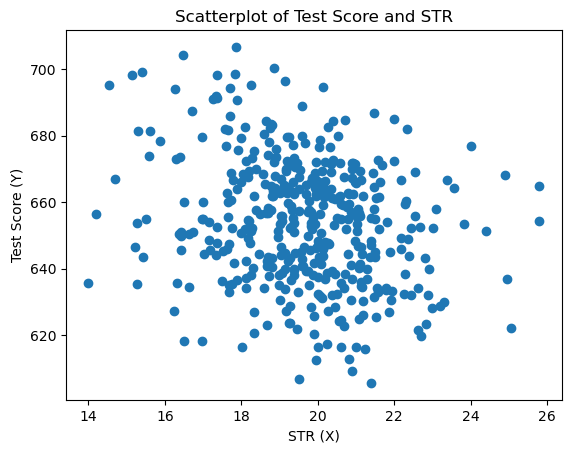

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(CASchools['STR'], CASchools['score'])
plt.title('Scatterplot of Test Score and STR')
plt.xlabel('STR (X)')
plt.ylabel('Test Score (Y)')
plt.show()


Para obtener los coeficiente y otras informaciones del modelo de regresion usaremos la libreria statsmodel, la cual nos permite obtener un resumen de la regresion lineal.

Usando la funcion OLS de la libreria statsmodel, podemos obtener el modelo de regresion lineal, para ello debemos pasarle los valores de la variable dependiente y la variable independiente. Posteriormente se aplica el metodo fit() para obtener el modelo de regresion lineal.

Seguido se aplica el metodo summary() para obtener el resumen del modelo de regresion lineal.

In [ ]:
import statsmodels.formula.api as smf

# estimate the model and assign the result to linear_model
linear_model = smf.ols(formula='score ~ STR', data=CASchools).fit()

# print the standard output of the estimated OLS RegressionResults object to the console
print(linear_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     22.58
Date:                Mon, 07 Aug 2023   Prob (F-statistic):           2.78e-06
Time:                        12:08:59   Log-Likelihood:                -1822.2
No. Observations:                 420   AIC:                             3648.
Df Residuals:                     418   BIC:                             3657.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    698.9329      9.467     73.825      0.0

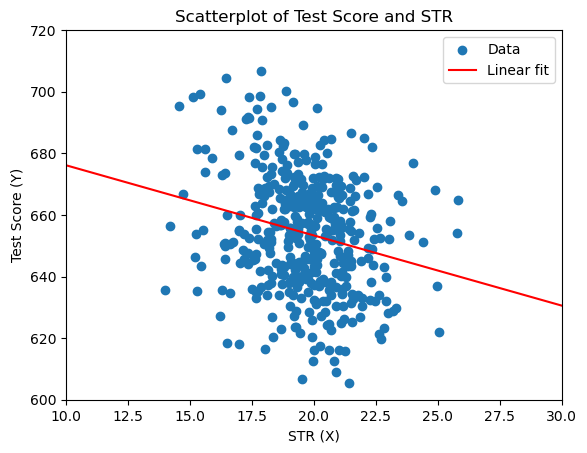

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# plot the data
plt.scatter(CASchools['STR'], CASchools['score'], label='Data')
plt.title('Scatterplot of Test Score and STR')
plt.xlabel('STR (X)')
plt.xlim(10, 30)
plt.ylim(600, 720)
plt.ylabel('Test Score (Y)')

# add the regression line
x = np.linspace(10, 30, 100)
y = linear_model.params[0] + linear_model.params[1]*x
plt.plot(x, y, color='red', label='Linear fit')

plt.legend()
plt.show()


Como puede ver, desde el resumen podemos obtener las informaciones relevantes para desarrollar el test de hipótesis.

Podemos acceder a informaciòn como el valor de la estadística de prueba, el p-value, el valor crítico, el intervalo de confianza, etc. A continuación, se muestra un ejemplo de cómo acceder a la información de la estadística de prueba y el p-value.


In [ ]:
import pandas as pd

# get the coefficient estimates
coefficients = linear_model.params

# get the standard errors
standard_errors = linear_model.bse

# get the t-values
t_values = linear_model.tvalues

# get the p-values
p_values = linear_model.pvalues

# organize the results into a data frame
results_df = pd.DataFrame({
    'Coefficient': coefficients,
    'Standard Error': standard_errors,
    't Value': t_values,
    'p Value': p_values
})

print(results_df)



           Coefficient  Standard Error    t Value        p Value
Intercept   698.932949        9.467491  73.824516  6.569846e-242
STR          -2.279808        0.479826  -4.751327   2.783308e-06


La segunda columna del resumen de los coeficientes informa $SE(\hat\beta_0)$ y $SE(\hat\beta_1)$. Además, en la tercera columna `'valor t'`, encontramos $t$-estadísticos $t^{act}$ adecuados para las pruebas de las hipótesis separadas $H_0: \beta_0=0$ y $H_0: \beta_1=0$. Además, la salida nos proporciona valores $p$ correspondientes a ambas pruebas contra las alternativas de dos caras $H_1:\beta_0\neq0$ respectivamente $H_1:\beta_1\neq0$ en la cuarta columna de la tabla.

Veamos más detenidamente la prueba de
$$H_0: \beta_1=0 \ \ \ vs. \ \ \ H_1: \beta_1 \neq 0.$$

Tenemos $$ t^{act} = \frac{-2.279808 - 0}{0.4798255} \approx - 4.75. $$

¿Qué nos dice esto sobre la significación del coeficiente estimado? Rechazamos la hipótesis nula en el $5\%$ nivel de significación desde $|t^{act}| > 1,96$. Es decir, el estadístico de prueba observado cae en la región de rechazo como $p\text{-valor} = 2,78\cdot 10^{-6} < 0.05$. Llegamos a la conclusión de que el coeficiente es significativamente diferente de cero. En otras palabras, rechazamos la hipótesis de que el tamaño de la clase *no influye* en las puntuaciones de los alumnos en los exámenes al nivel $5\%$.

Observe que, aunque la diferencia es insignificante en este caso, como veremos más adelante, `summary()` no realiza la aproximación normal, sino que calcula los valores $p$ utilizando la distribución $t$. Generalmente, los grados de libertad de la distribución $t$ asumida se determinan de la siguiente manera:

$$ \text{DF} = n - k - 1 $$

donde $n$ es el número de observaciones utilizadas para estimar el modelo y $k$ es el número de regresores, excluyendo el intercepto. En nuestro caso, tenemos $n=420$ observaciones y el único regresor es $STR$, por lo que $k=1$. La forma más sencilla de determinar los grados de libertad del modelo es


In [ ]:
print(linear_model.df_resid)

418.0


Por lo tanto, para la distribución de muestreo supuesta de $\hat\beta_1$ tenemos

$$\hat\beta_1 \sim t_{418}$$

tal que el valor $p$ para una prueba de significación a dos caras puede obtenerse ejecutando el siguiente código:


In [ ]:
import scipy.stats as stats

p_value = 2 * stats.t.cdf(-4.751327, df=418)
print(p_value)


2.7833096733167458e-06


El resultado es muy parecido al valor proporcionado por `summary()`. Sin embargo, dado que $n$ es suficientemente grande, se podría utilizar la densidad normal estándar para calcular el valor $p$:


In [ ]:
import scipy.stats as stats

p_value = 2 * stats.norm.cdf(-4.751327)
print(p_value)


2.0208601573163653e-06


En efecto, la diferencia es insignificante. Estos resultados nos dicen que, si $H_0: \beta_1 = 0$ es cierto y repitiéramos todo el proceso de recopilación de observaciones y estimación del modelo, ¡observar un $\hat\beta_1 \geq |-2,28|$ es muy improbable!

Utilizando `Python` podemos visualizar cómo se hace tal afirmación cuando se utiliza la aproximación normal. Esto refleja los principios representados en la figura 5.1 del libro. No deje que el siguiente trozo de código le disuada: el código es algo más largo que los ejemplos habituales y tiene un aspecto poco atractivo, pero hay mucha repetición ya que se añaden sombreados de color y anotaciones en ambas colas de la distribución normal. Recomendamos ejecutar el código paso a paso para ver cómo se aumenta el gráfico con las anotaciones.



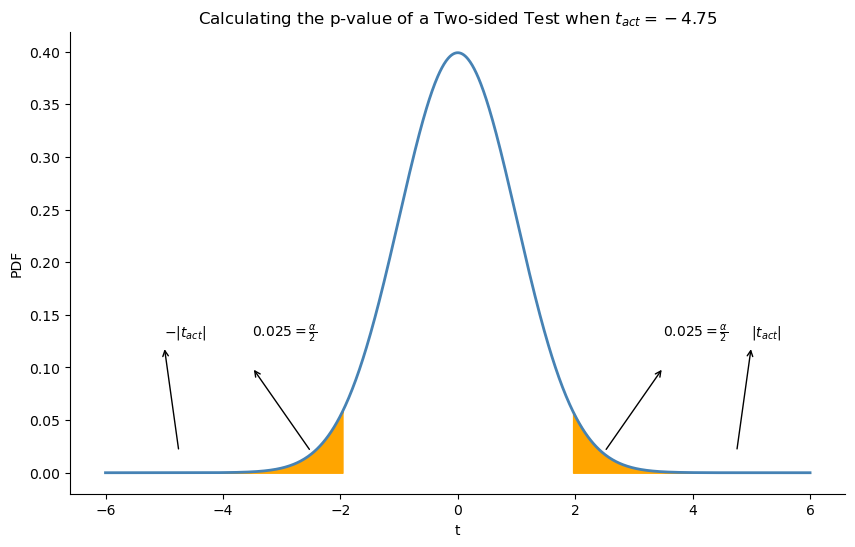

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

t = np.linspace(-6, 6, 1000)
y = stats.norm.pdf(t, 0, 1)
tact = -4.75

plt.figure(figsize=(10, 6))

# Plot the standard normal distribution
plt.plot(t, y, color="steelblue", linewidth=2)

# Shade the critical regions
plt.fill_between(t, y, where=(t <= -1.96), color='orange')
plt.fill_between(t, y, where=(t >= 1.96), color='orange')

# Add arrows and texts indicating critical regions and the p-value
plt.annotate('', xy=(-3.5, 0.1), xytext=(-2.5, 0.02),
             arrowprops={'arrowstyle': '->'})
plt.annotate('', xy=(3.5, 0.1), xytext=(2.5, 0.02),
             arrowprops={'arrowstyle': '->'})
plt.annotate('', xy=(-5, 0.12), xytext=(-4.75, 0.02),
             arrowprops={'arrowstyle': '->'})
plt.annotate('', xy=(5, 0.12), xytext=(4.75, 0.02),
             arrowprops={'arrowstyle': '->'})

plt.text(-3.5, 0.13, r'$0.025=\frac{\alpha}{2}$', fontsize=10)
plt.text(3.5, 0.13, r'$0.025=\frac{\alpha}{2}$', fontsize=10)
plt.text(-5, 0.13, r'$-|t_{act}|$', fontsize=10)
plt.text(5, 0.13, r'$|t_{act}|$', fontsize=10)

# Set title and labels
plt.title(r'Calculating the p-value of a Two-sided Test when $t_{act}=-4.75$')
plt.xlabel('t')
plt.ylabel('PDF')

# Hide the right and top spines
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()



**Estimador: Propiedades deseables**

1.  Imparcial

2.  Consistencia

-  $plim\hat{\beta_n}=\beta$
-  Basándonos en la ley de los grandes números, podemos deducir la coherencia
- Más observaciones significa más precisión, más proximidad al valor real.

1.  Eficiencia

-   Varianza mínima en comparación con otro estimador.

- OLS es BLUE (mejor estimador lineal insesgado) significa que OLS es el más eficiente entre la clase de estimadores lineales insesgados  [Teorema de Gauss-Markov](#gauss-markov-theorem)
- Si los supuestos de distribución son correctos, la máxima verosimilitud es asintótica.


## Intervalos de confianza para los coeficientes de regresión

Como ya sabemos, las estimaciones de los coeficientes de regresión $\beta_0$ y $\beta_1$ están sujetas a la incertidumbre de muestreo. Por lo tanto, *nunca* estimaremos exactamente el verdadero valor de estos parámetros a partir de los datos de la muestra en una aplicación empírica. Sin embargo, podemos construir intervalos de confianza para el intercepto y el parámetro de la pendiente.

Un intervalo de confianza de $95\%$ para $\beta_i$ tiene dos definiciones equivalentes:

- El intervalo es el conjunto de valores para los que no se puede rechazar una prueba de hipótesis al nivel de $5\%$.
- El intervalo tiene una probabilidad de $95\%$ de contener el valor verdadero de $\beta_i$. Así, en el $95\%$ de todas las muestras que podrían extraerse, el intervalo de confianza cubrirá el verdadero valor de $\beta_i$.

También decimos que el intervalo tiene un nivel de confianza del $95\%$. La idea del intervalo de confianza se resume a continuación.


## Un intervalo de confianza para $\beta_i$

Imagine que puede extraer todas las muestras aleatorias posibles de un tamaño dado. El intervalo que contiene el valor verdadero $\beta_i$ en el $95\%$ de todas las muestras viene dado por la expresión:
$$
\text{CI}_{0.95}^{\beta_i} = \left[ \hat{\beta}_i - 1.96 \times SE(\hat{\beta}_i) \, , \, \hat{\beta}_i + 1.96 \times SE(\hat{\beta}_i) \right].
$$

- De forma equivalente, este intervalo puede considerarse como el conjunto de hipótesis nulas que no se rechazan en una prueba de hipótesis bilateral de $5\%$.



### Simulación: Intervalos de confianza

Para comprender mejor los intervalos de confianza, realizaremos otro estudio de simulación. Por ahora, supongamos que tenemos la siguiente muestra de $n=100$ observaciones sobre una única variable $Y$ donde

$$ Y_i \overset{i.i.d}{\sim} \mathcal{N}(5,25), \ i = 1, \dots, 100.$$

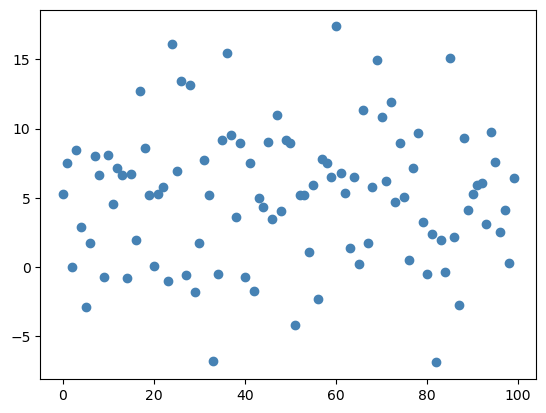

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(4)

# Generate the sample data
Y = np.random.normal(loc=5, scale=5, size=100)

# Plot the sample data
plt.scatter(range(100), Y, color="steelblue", marker='o')
plt.show()


Suponemos que los datos son generados por el modelo

$$ Y_i = \mu + \epsilon_i $$

donde $\mu$ ies una constante desconocida y sabemos que $\epsilon_i \overset{i.i.d.}{\sim} \mathcal{N}(0,25)$. En este modelo, el estimador OLS para $\mu$ viene dado por $$ \hat\mu = \overline{Y} = \frac{1}{n} \sum_{i=1}^n Y_i, $$ es decir, la media muestral de $Y_i$. Además, se cumple que

$$ SE(\hat\mu) = \frac{\sigma_{\epsilon}}{\sqrt{n}} = \frac{5}{\sqrt{100}} $$


Un intervalo de confianza $95\%$ de gran muestra para $\mu$ viene dado entonces por

\begin{equation}
CI^{\mu}_{0.95} = \left[\hat\mu - 1.96 \times \frac{5}{\sqrt{100}} \ , \ \hat\mu + 1.96 \times \frac{5}{\sqrt{100}}  \right]. (\#eq:KI)
\end{equation}

Es bastante fácil calcular a mano este intervalo en `Python`. El siguiente fragmento de código genera un vector con nombre que contiene los límites del intervalo:


In [ ]:
import numpy as np

# Calculate the lower and upper confidence interval
CIlower = np.mean(Y) - 1.96 * 5 / np.sqrt(10)
CIupper = np.mean(Y) + 1.96 * 5 / np.sqrt(10)

# Display the results
print(f"CIlower: {CIlower}, CIupper: {CIupper}")


CIlower: 2.0773357829044055, CIupper: 8.275399996834429


Sabiendo que $\mu = 5$ vemos que, para nuestros datos de ejemplo, el intervalo de confianza cubre el valor verdadero.

A diferencia de los ejemplos del mundo real, podemos utilizar `python` para comprender mejor los intervalos de confianza muestreando repetidamente los datos, estimando $\mu$ y calculando el intervalo de confianza para $\mu$ como en (eq:KI).

El procedimiento es el siguiente:



In [ ]:
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Initialize lists of lower and upper interval boundaries
lower = []
upper = []

# Loop for sampling, estimation, and CI calculation
for i in range(10000):
    Y = np.random.normal(loc=5, scale=5, size=100)
    lower.append(np.mean(Y) - 1.96 * 5 / np.sqrt(10))
    upper.append(np.mean(Y) + 1.96 * 5 / np.sqrt(10))

# Join lists of interval bounds in an array
CIs = np.array([lower, upper]).T


De acuerdo con la definición de intervalo de confianza, esperamos que la fracción de los $10000$ intervalos simulados guardados en la matriz `('CIs')` que contienen el valor verdadero $\mu=5$ sea aproximadamente $95\%$. Podemos comprobarlo fácilmente utilizando operadores lógicos.

In [ ]:
np.mean((CIs[:, 0] <= 5) & (5 <= CIs[:, 1]))


1.0

La simulación muestra que la fracción de intervalos que cubren $\mu=5$, es decir, aquellos intervalos para los que no se puede rechazar $H_0: \mu = 5$ es cercana al valor teórico de $95\%$.

Dibujemos un gráfico de los primeros $100$ intervalos de confianza simulados e indiquemos los que *no* cubren el verdadero valor de $\mu$. Lo hacemos mediante líneas horizontales que representan los intervalos de confianza superpuestos.


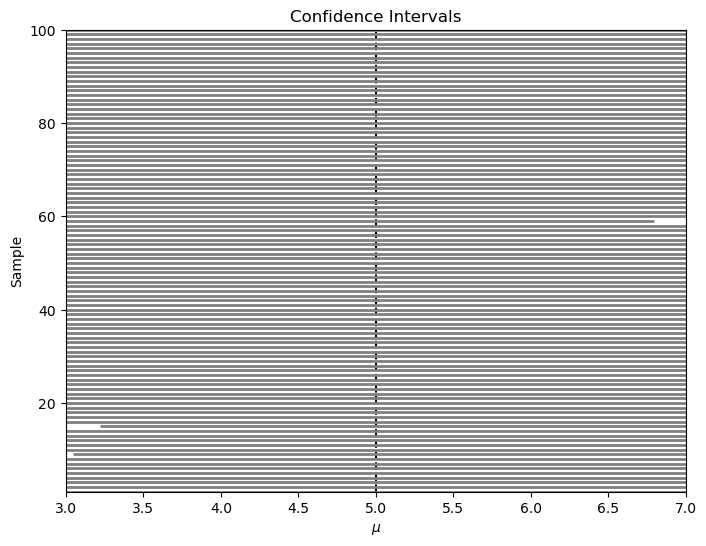

In [ ]:
import matplotlib.pyplot as plt

# identify intervals not covering mu
# (4 intervals out of 100)
ID = np.where(~((CIs[:100, 0] <= 5) & (5 <= CIs[:100, 1])))[0]

# initialize the plot
plt.figure(figsize=(8, 6))
plt.xlim(3, 7)
plt.ylim(1, 100)
plt.ylabel('Sample')
plt.xlabel('$\mu$')
plt.title('Confidence Intervals')

# set up color vector
colors = ['gray' if i not in ID else 'red' for i in range(100)]

# draw reference line at mu=5
plt.axvline(x=5, linestyle='--', color='black')

# add horizontal bars representing the CIs
for j in range(100):
    plt.hlines(y=j+1, xmin=CIs[j, 0], xmax=CIs[j, 1], color=colors[j], linewidth=2)

plt.show()


Para las primeras muestras de $100$, la hipótesis nula verdadera se rechaza en cuatro casos, por lo que estos intervalos no cubren $\mu=5$. Hemos indicado los intervalos que conducen a un rechazo de la roja nula.



Volvamos ahora al ejemplo de las puntuaciones de los tests y el tamaño de las clases. Una forma fácil de obtener intervalos de confianza de $95\%$ para $\beta_0$ y $\beta_1$ es utilizar la función `('conf_int()')`. Sólo tenemos que proporcionar un objeto modelo ajustado como entrada a esta función. El nivel de confianza se establece en $95\%$ por defecto, pero puede modificarse estableciendo el argumento `('alpha')`.


In [ ]:
print(linear_model.conf_int(alpha=0.05))

                    0           1
Intercept  680.323124  717.542775
STR         -3.222980   -1.336636


Comprobemos si el cálculo se realiza como esperamos para $\beta_1$, el coeficiente sobre `'STR`.

In [ ]:
import scipy.stats as stats

# Get the model parameters and standard errors
params = linear_model.params
stderr = linear_model.bse

# Compute the confidence intervals manually
confidence_interval = pd.DataFrame({'lower': params - stats.t.ppf(0.975, df = linear_model.df_resid) * stderr,
                                    'upper': params + stats.t.ppf(0.975, df = linear_model.df_resid) * stderr})

print(confidence_interval)


                lower       upper
Intercept  680.323124  717.542775
STR         -3.222980   -1.336636



Los límites superior e inferior coinciden. Hemos utilizado el $0,975$-cuantil de la distribución $t_{418}$ para obtener el resultado exacto reportado por `("conf_int")`.  Obviamente, este intervalo *no* contiene el valor cero que, como ya hemos visto en el apartado anterior, conduce al rechazo de la hipótesis nula $\beta_{1,0} = 0$.

## Regresión cuando X es una variable binaria

En lugar de utilizar un regresor continuo $X$, podríamos estar interesados en ejecutar la regresión

$$ Y_i = \beta_0 + \beta_1 D_i + u_i \tag{5.2} $$

donde $D_i$ es una variable binaria, una denominada *variable ficticia*. Por ejemplo, podemos definir $D_i$ como sigue:

$$ D_i = \begin{cases}
1 \ \ \text{if $STR$ in $i^{th}$ school district < 20} \\
        0 \ \ \text{if $STR$ in $i^{th}$ school district $\geq$ 20} \\
      \end{cases} \tag{5.3} $$

El modelo de regresión ahora es
$$ TestScore_i = \beta_0 + \beta_1 D_i + u_i. \tag{5.4} $$

Veamos cómo quedan estos datos en un gráfico de dispersión:

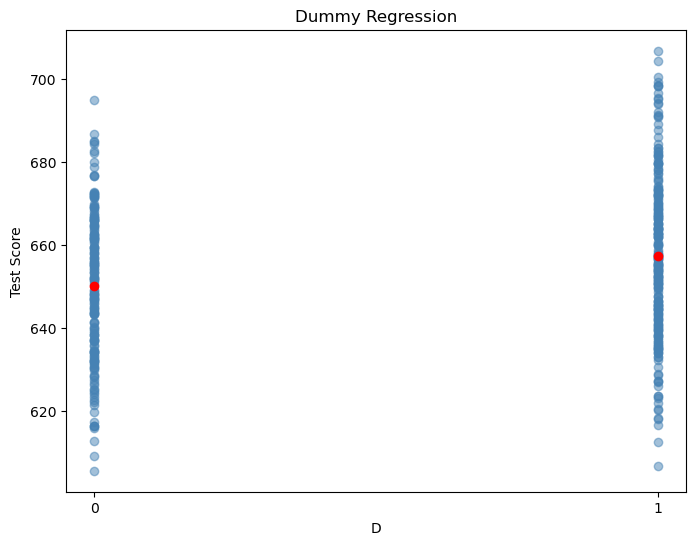

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create the dummy variable as defined above
CASchools['D'] = CASchools['STR'] < 20

# Compute the average score when D=1 (low STR)
mean_score_for_D_1 = CASchools.loc[CASchools['D'] == True, 'score'].mean()

# Compute the average score when D=0 (high STR)
mean_score_for_D_0 = CASchools.loc[CASchools['D'] == False, 'score'].mean()

plt.figure(figsize=(8,6))

# Plot the data
plt.scatter(CASchools['D'], CASchools['score'], c='steelblue', alpha=0.5)

# Add the average for each group
plt.scatter([0], [mean_score_for_D_0], color='red', zorder=5)
plt.scatter([1], [mean_score_for_D_1], color='red', zorder=5)

plt.xlabel('D')
plt.ylabel('Test Score')
plt.title('Dummy Regression')
plt.xticks([0, 1])

plt.show()


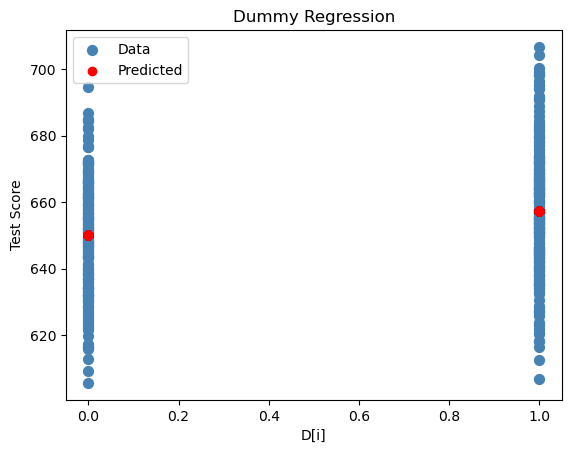

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Assuming CASchools is a pandas DataFrame
CASchools['D'] = CASchools['STR'] < 20

# estimate the dummy regression
dummy_model = smf.ols(formula='score ~ D', data=CASchools).fit()

# Plot the data
plt.scatter(CASchools['D'], CASchools['score'], s=50, c='Steelblue', label='Data')
plt.scatter(CASchools['D'], dummy_model.predict(), color='red', label='Predicted')
plt.xlabel('D[i]')
plt.ylabel('Test Score')
plt.title('Dummy Regression')
plt.legend()
plt.show()





Con $D$ como regresor, no es útil pensar en $\beta_1$ como parámetro de la pendiente, ya que $D_i \in \{0,1\}$, es decir, sólo observamos dos valores discretos en lugar de un continuo de valores del regresor. No existe una línea continua que represente la función de expectativa condicional $E(TestScore_i | D_i)$ ya que esta función sólo está definida para las posiciones $x$ $0$ y $1$.

Por lo tanto, la interpretación de los coeficientes de este modelo de regresión es la siguiente:

- $E(Y_i | D_i = 0) = \beta_0$, so $\beta_0$ es la puntuación esperada en los exámenes en los distritos donde $D_i=0$ donde $STR$ es superior a $20$.

- $E(Y_i | D_i = 1) = \beta_0 + \beta_1$ o, utilizando el resultado anterior, $\beta_1 = E(Y_i | D_i = 1) - E(Y_i | D_i = 0)$. Así, $\beta_1$ es *la diferencia en las expectativas específicas de grupo*, es decir, la diferencia en la puntuación esperada en el examen entre los distritos con $STR < 20$ y aquellos con $STR \geq 20$.

A continuación utilizaremos `Python` para estimar el modelo de regresión ficticio definido por las ecuaciones (<a href="#mjx-eqn-5.2">5.2</a>) and (<a href="#mjx-eqn-5.3">5.3</a>) .



In [ ]:
dummy_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     15.07
Date:                Mon, 07 Aug 2023   Prob (F-statistic):           0.000120
Time:                        12:33:03   Log-Likelihood:                -1825.9
No. Observations:                 420   AIC:                             3656.
Df Residuals:                     418   BIC:                             3664.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    650.0768      1.393    466.666      0.000     647.339     652.815
D[T.True]      7.1694      1.847      3.882      0.000       3.540      10.799
==============================================================================
Omnibus:                        3.120   Durbin-Watson:                   0.107
Prob(Omnibus):                  0.210   Jarque-Bera (JB):                2.483
Skew:                           0.052   Prob(JB):                        0.289
Kurtosis:                       2.638   Cond. No.                         2.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""



Se puede ver que la puntuación prevista en los distritos con $STR < 20$ ($D_i = 1$) se predice en $650,1 + 7,17 = 657,27$, mientras que se espera que los distritos con $STR < 20$ ($D_i = 0$) tengan una puntuación media de sólo $650,1$.

Las predicciones específicas de grupo pueden añadirse al gráfico ejecutando el siguiente fragmento de código.

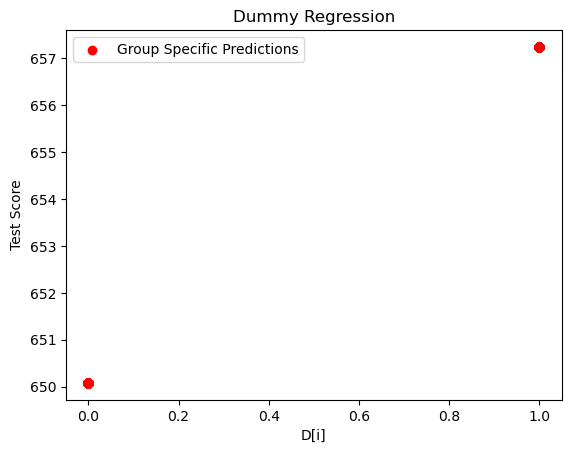

In [ ]:
# Add group specific predictions to the plot
plt.scatter(CASchools['D'], dummy_model.predict(), color='red', label='Group Specific Predictions')

# Remaining plot elements
plt.xlabel('D[i]')
plt.ylabel('Test Score')
plt.title('Dummy Regression')
plt.legend()
plt.show()


Aquí utilizamos la función `('predict()')` para obtener estimaciones de las medias específicas de cada grupo. Los puntos rojos representan estas medias de grupos de muestra. En consecuencia, $\hat{\beta}_1 = 7,17$ puede verse como la diferencia en las medias de grupo.

`('summary(dummy_model)')` también responde a la pregunta de si existe una diferencia estadísticamente significativa en las medias de los grupos. Esto, a su vez, apoyaría la hipótesis de que los estudiantes rinden de forma diferente cuando se les enseña en clases pequeñas. Podemos evaluar esto mediante una prueba de dos colas de la hipótesis $H_0: \beta_1 = 0$. Convenientemente, el estadístico $t$ y el correspondiente valor $p$ para esta prueba se calculan mediante `('summary()')`.

Dado que `('valor t')` $= 3,88 > 1,96$ rechazamos la hipótesis nula al nivel de significación de $5\%$. Se llega a la misma conclusión cuando se utiliza el valor $p$, que informa de la significación hasta el nivel de 0,00012%$.

Como se hace con `("linear_model")`, podemos utilizar alternativamente la función `('conf_int()')` para calcular un intervalo de confianza de $95\%$ para la verdadera diferencia de medias y ver si el valor de la hipótesis es un elemento de este conjunto de confianza.


In [ ]:
# Compute confidence intervals for coefficients in the dummy regression model
conf_intervals = dummy_model.conf_int()
print(conf_intervals)


                    0           1
Intercept  647.338594  652.815002
D[T.True]    3.539562   10.799309


Rechazamos la hipótesis de que no hay diferencia entre las medias de grupo en el $5\%$ nivel de significación ya que $\beta_{1,0} = 0$ se encuentra fuera de $[3,54, 10,8]$, el $95\%$ intervalo de confianza para el coeficiente de $D$.

## Heteroscedasticidad y homoscedasticidad

Todas las inferencias realizadas en los capítulos anteriores se basan en el supuesto de que la varianza del error no varía a medida que cambian los valores de los regresores. Pero esto no suele ser así en las aplicaciones empíricas.



- El término de error de nuestro modelo de regresión es homocedastico si la varianza de la distribución condicional de $u_i$ dada $X_i$, $Var(u_i|X_i=x)$, es constante *para todas* las observaciones de nuestra muestra:

$$
\text{Var}(u_i|X_i=x) = \sigma^2 \quad \forall \quad i=1,\dots,n.
$$

- Si en cambio hay dependencia de la varianza condicional de $u_i$ con $X_i$, se dice que el término de error es heteroscedástico. Entonces escribimos
$$
\text{Var}(u_i|X_i=x) = \sigma_i^2 \quad \forall \quad i=1,\dots,n.
$$

- La homocedasticidad es un *caso especial* de la heteroscedasticidad.






Para comprender mejor la heteroscedasticidad, generamos algunos datos bivariantes heteroscedásticos, estimamos un modelo de regresión lineal y utilizamos gráficos de caja para representar las distribuciones condicionales de los residuos.



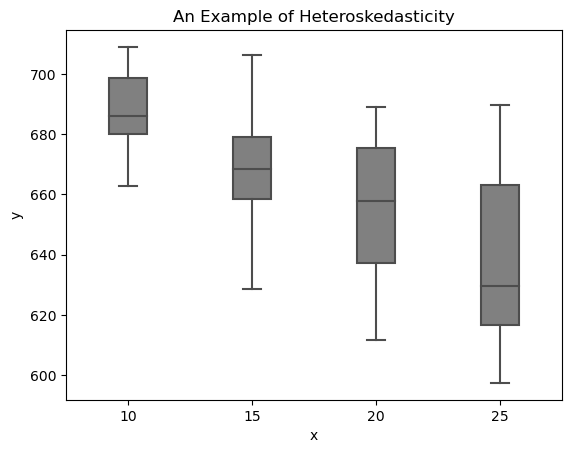

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# set seed for reproducibility
np.random.seed(123)

# set up vector of x coordinates
x = np.repeat([10, 15, 20, 25], repeats=25)

# initialize vector of errors
e = np.concatenate([
    np.random.normal(scale=10, size=25),
    np.random.normal(scale=15, size=25),
    np.random.normal(scale=20, size=25),
    np.random.normal(scale=25, size=25)
])

# set up y
y = 720 - 3.3 * x + e

# create a DataFrame
df = pd.DataFrame({'x': x, 'y': y})

# Estimate the model
X = sm.add_constant(df['x']) # adding a constant
mod = sm.OLS(df['y'], X).fit()

# Create scatter plot
plt.scatter(x, y, s=50, color='black')

# Add the regression line to the plot
plt.plot(x, mod.predict(X), color='darkred')

# Set labels and title
plt.xlabel("Student-Teacher Ratio")
plt.ylabel("Test Score")
plt.title("An Example of Heteroskedasticity")

# Create boxplots
sns.boxplot(x='x', y='y', data=df, color='gray', width=0.3)

plt.show()


Para estos datos artificiales está claro que las varianzas de error condicional difieren. En concreto, observamos que la varianza de las puntuaciones de los exámenes (y, por tanto, la varianza de los errores cometidos) *aumenta* con la relación alumno-profesor.



### Un ejemplo real de heteroscedasticidad

Piense en el valor económico de la educación: si no existiera un valor económico añadido esperado al recibir educación universitaria, probablemente usted no estaría leyendo este guión ahora mismo. Un punto de partida para verificar empíricamente tal relación es disponer de datos sobre individuos que trabajan. Más concretamente, necesitamos datos sobre los salarios y la educación de los trabajadores para estimar un modelo como el siguiente

$$ wage_i = \beta_0 + \beta_1 \cdot education_i + u_i. $$

¿Qué se puede suponer de esta relación? Es probable que, por término medio, los trabajadores con más estudios ganen más que los trabajadores con menos estudios, por lo que esperamos estimar una línea de regresión con pendiente ascendente. Asimismo, parece posible que los ingresos de los trabajadores mejor formados tengan una mayor dispersión que los de los trabajadores poco cualificados: una formación sólida no es garantía de un salario alto, por lo que incluso los trabajadores altamente cualificados aceptan empleos con bajos ingresos. Sin embargo, es más probable que cumplan los requisitos para los empleos bien remunerados que los trabajadores con menos estudios, para quienes las oportunidades en el mercado laboral son mucho más limitadas.

Para comprobarlo empíricamente podemos utilizar datos reales sobre los ingresos por hora y el número de años de educación de los empleados. Estos datos pueden encontrarse en `r ttcode('CPSSWEducation')`. Este conjunto de datos forma parte del paquete `r ttcode('AER')` y procede de la Current Population Survey (CPS) que realiza periódicamente el [Bureau of Labor Statistics](http://www.bls.gov/) en los Estados Unidos.

Los siguientes trozos de código muestran cómo importar los datos en `r ttcode('R')` y cómo producir un gráfico como el de la Figura 5.3 del libro.


        Unnamed: 0          age     earnings    education
count  2950.000000  2950.000000  2950.000000  2950.000000
mean   1475.500000    29.497627    16.742717    13.550169
std     851.735972     0.500079     9.402076     2.314100
min       1.000000    29.000000     2.136752     6.000000
25%     738.250000    29.000000    10.576923    12.000000
50%    1475.500000    29.000000    14.615385    13.000000
75%    2212.750000    30.000000    20.192308    16.000000
max    2950.000000    30.000000    97.500000    18.000000


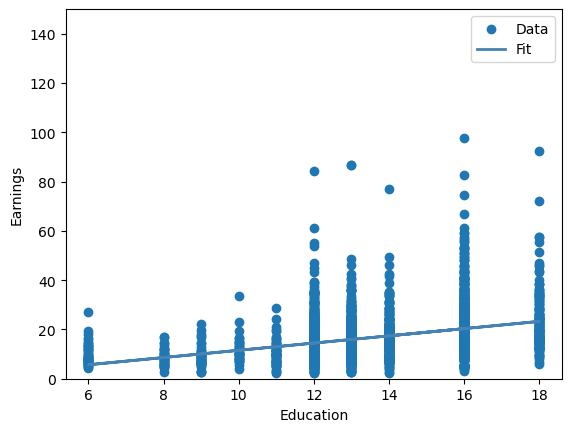

In [ ]:
import statsmodels.formula.api as smf

CPSSWEducation = pd.read_csv("CPSSWEducation.csv")

print(CPSSWEducation.describe())

# estimate a simple regression model
labor_model = smf.ols(formula='earnings ~ education', data=CPSSWEducation).fit()

# plot observations and add the regression line
plt.scatter(CPSSWEducation['education'], CPSSWEducation['earnings'], label='Data')
plt.plot(CPSSWEducation['education'], labor_model.predict(), color='steelblue', linewidth=2, label='Fit')
plt.xlabel('Education')
plt.ylabel('Earnings')
plt.ylim(0, 150)
plt.legend()
plt.show()



El gráfico revela que la media de la distribución de los ingresos aumenta con el nivel de estudios. Esto también se ve corroborado por un análisis formal: el modelo de regresión estimado almacenado en `labor_model` muestra que existe una relación positiva entre los años de educación y los ingresos.


In [ ]:
print(labor_model.summary())


                            OLS Regression Results                            
Dep. Variable:               earnings   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     441.9
Date:                Mon, 07 Aug 2023   Prob (F-statistic):           1.58e-91
Time:                        12:58:28   Log-Likelihood:                -10590.
No. Observations:                2950   AIC:                         2.118e+04
Df Residuals:                    2948   BIC:                         2.120e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.1344      0.959     -3.268      0.0

La ecuación de regresión estimada establece que, por término medio, un año adicional de educación aumenta los ingresos por hora de un trabajador en aproximadamente $\$ 1,47$. Una vez más, utilizamos ('conf_int()')` para obtener un intervalo de confianza de $95\%$ para ambos coeficientes de regresión.


In [ ]:
# compute a 95% confidence interval for the coefficients in the model
print(labor_model.conf_int())


                  0         1
Intercept -5.015248 -1.253495
education  1.330098  1.603753




Dado que el intervalo es $[1,33, 1,60]$, podemos rechazar la hipótesis de que el coeficiente de `educación` es cero al nivel de $5\%$.

Además, el gráfico indica que existe heteroscedasticidad: si suponemos que la línea de regresión es una representación razonablemente buena de la función media condicional $E(ingresos_i\vert educación_i)$, la dispersión de los ingresos por hora en torno a esa función aumenta claramente con el nivel de educación, es decir, aumenta la varianza de la distribución de los ingresos. En otras palabras: la varianza de los errores (los errores cometidos al explicar los ingresos por la educación) aumenta con la educación, de modo que los errores de regresión son heteroscedásticos.

Este ejemplo demuestra que el supuesto de homocedasticidad es dudoso en las aplicaciones económicas. ¿Deberíamos preocuparnos por la heteroscedasticidad? Sí, debería. Como se explica en la siguiente sección, la heteroscedasticidad puede tener graves consecuencias negativas en las pruebas de hipótesis, si la ignoramos.



### ¿Debería preocuparnos la heteroscedasticidad?

Para responder a la pregunta de si debemos preocuparnos por la presencia de heteroscedasticidad, consideremos la varianza de $\hat\beta_1$ bajo el supuesto de homoscedasticidad. En este caso tenemos

$$ \sigma^2_{\hat\beta_1} = \frac{\sigma^2_u}{n \cdot \sigma^2_X} \tag{5.5} $$

la cual es una versión simplificada de la ecuación general para las estimaciones

$$ \overset{\sim}{\sigma}^2_{\hat\beta_1} = \frac{SER^2}{\sum_{i=1}^n (X_i - \overline{X})^2} \ \ \text{where} \ \ SER=\frac{1}{n-2} \sum_{i=1}^n \hat u_i^2. $$

Así, `('summary()')` estima el error estándar *sólo de homoscedasticidad*.

$$ \sqrt{ \overset{\sim}{\sigma}^2_{\hat\beta_1} } = \sqrt{ \frac{SER^2}{\sum_{i=1}^n(X_i - \overline{X})^2} }. $$

De hecho, se trata de un estimador de la desviación típica del estimador $\hat{\beta}_1$ que es *inconsistente* con el valor verdadero $\sigma^2_{\hat\beta_1}$  cuando hay heteroscedasticidad.  La implicación es que las estadísticas $t$ calculadas según las distribuciones del muestreo no siguen una distribución normal estándar, incluso en muestras grandes. Este problema puede invalidar la inferencia al utilizar las herramientas tratadas anteriormente para la comprobación de hipótesis: ¡deberíamos ser cautos al hacer afirmaciones sobre la significación de los coeficientes de regresión basándonos en los estadísticos $t$ calculados por `'summary()` o los intervalos de confianza producidos por `'conf_int()` si es dudoso que se cumpla el supuesto de homocedasticidad!

Ahora vamos a calcular el error estándar de homoscedasticidad para $\hat{\beta}_1$ en el modelo de regresión `('labor_model')` a mano y ver que coincide con el valor producido por `('summary()')`.


In [ ]:
import numpy as np

# Store model summary in 'model'
model = labor_model.summary()

# Extract the standard error of the regression from model summary
SER = np.sqrt(labor_model.mse_resid)

# Compute the variation in 'education'
V = (len(CPSSWEducation) - 1) * np.var(CPSSWEducation['education'])

# Compute the standard error of the slope parameter's estimator and print it
SE_beta_1_hat = np.sqrt(SER**2/V)
print(SE_beta_1_hat)

# Use logical operators to see if the value computed by hand matches the one provided
# in mod$coefficients. Round estimates to four decimal places
print(round(labor_model.bse['education'], 4) == round(SE_beta_1_hat, 4))


0.06979463619979433
True


De hecho, los valores estimados son iguales.



### Cálculo de errores estándar robustos a la heteroscedasticidad

La estimación consistente de $\sigma_{\hat{\beta}_1}$ bajo heteroscedasticidad se garantiza cuando se utiliza el siguiente estimador *robusto*.

$$ SE(\hat{\beta}_1) = \sqrt{ \frac{1}{n} \cdot \frac{ \frac{1}{n} \sum_{i=1}^n (X_i - \overline{X})^2 \hat{u}_i^2 }{ \left[ \frac{1}{n} \sum_{i=1}^n (X_i - \overline{X})^2  \right]^2} } \tag{5.6} $$


Las estimaciones del error típico calculadas de este modo también se denominan [Eicker-Huber-White standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors).


Puede resultar bastante engorroso realizar este cálculo a mano. Por suerte, existen ciertas funciones de Python que sirven para este propósito. 

\begin{align}
SE(\hat{\beta}_1)_{HC1} = \sqrt{ \frac{1}{n} \cdot \frac{ \frac{1}{n-2} \sum_{i=1}^n (X_i - \overline{X})^2 \hat{u}_i^2 }{ \left[ \frac{1}{n} \sum_{i=1}^n (X_i - \overline{X})^2  \right]^2}} (\#eq:hc1)
\end{align}


Calculemos ahora estimaciones robustas de errores estándar para los coeficientes en `r ttcode('linear_model')`.


In [ ]:
# compute heteroskedasticity-robust standard errors
robust_linear_model = labor_model.get_robustcov_results(cov_type='HC1')
robust_linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               earnings   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     415.8
Date:                Mon, 07 Aug 2023   Prob (F-statistic):           1.45e-86
Time:                        13:10:11   Log-Likelihood:                -10590.
No. Observations:                2950   AIC:                         2.118e+04
Df Residuals:                    2948   BIC:                         2.120e+04
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.1344      0.926     -3.385      0.001      -4.950      -1.319
education      1.4669      0.072     20.390      0.000       1.326       1.608
==============================================================================
Omnibus:                     1621.825   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19204.850
Skew:                           2.365   Prob(JB):                         0.00
Kurtosis:                      14.570   Cond. No.                         82.1
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [ ]:

# Get the variance-covariance matrix of the parameter estimates
vcov = robust_linear_model.cov_params()
print(vcov)


[[ 0.85726285 -0.06573674]
 [-0.06573674  0.00517569]]


En este código:
  
 - El método get_robustcov_results se ejecuta en el modelo ajustado para calcular los errores estándar robustos. El argumento cov_type especifica el tipo de errores estándar robustos a calcular. En este caso, HC1 corresponde al estimador robusto de matriz de covarianza de heteroscedasticidad.
  - El método cov_params se ejecuta en el objeto devuelto para obtener la matriz de varianza-covarianza de las estimaciones de los parámetros, que se imprime en la consola.

La salida de `vcov` es la matriz de varianza-covarianza de las estimaciones de coeficientes. Nos interesa la raíz cuadrada de los elementos diagonales de esta matriz, es decir, las estimaciones del error estándar.


---
Cuando tenemos k > 1 regresores, escribir las ecuaciones de un modelo de regresión resulta muy complicado. Una forma más cómoda de denotar y estimar los llamados modelos de regresión múltiple (Luego lo veremos) es utilizar el álgebra matricial. Esta es la razón por la que funciones como `vcovHC()` producen matrices. En el modelo de regresión lineal simple, las varianzas y covarianzas de los estimadores pueden reunirse en la matriz simétrica de varianzas-covarianzas:

$$
\text{Var}
  \begin{pmatrix}
    \hat\beta_0 \\
    \hat\beta_1
  \end{pmatrix} =
\begin{pmatrix}
  \text{Var}(\hat\beta_0) & \text{Cov}(\hat\beta_0,\hat\beta_1) \\
\text{Cov}(\hat\beta_0,\hat\beta_1) & \text{Var}(\hat\beta_1)
\end{pmatrix},
$$

- Entonces, `vcovHC()` nos da $\widehat{\text{Var}}(\hat\beta_0)$, $\widehat{\text{Var}}(\hat\beta_1)$ y $\widehat{\text{Cov}}(\hat\beta_0,\hat\beta_1)$, pero la mayoría de las veces nos interesan los elementos diagonales de la matriz estimada.
---



In [ ]:
import numpy as np

# compute the square root of the diagonal elements in vcov
robust_se = np.sqrt(np.diag(vcov))
print(robust_se)


[0.9258849  0.07194227]





Supongamos ahora que queremos generar un resumen de coeficientes como el proporcionado por `('summary()')` pero con errores estándar *robustos* de los estimadores de coeficientes, estadísticas $t$ robustas y valores $p$ correspondientes para el modelo de regresión `("linear_model")`. 

In [ ]:
# we invoke the function `summary()` on our robust model
print(robust_linear_model.summary())


                            OLS Regression Results                            
Dep. Variable:               earnings   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     415.8
Date:                Mon, 07 Aug 2023   Prob (F-statistic):           1.45e-86
Time:                        13:12:48   Log-Likelihood:                -10590.
No. Observations:                2950   AIC:                         2.118e+04
Df Residuals:                    2948   BIC:                         2.120e+04
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.1344      0.926     -3.385      0.0



Vemos que los valores reportados en la columna `('std err')` son iguales a los de `('sqrt(diag(vcov))')`.

¿Hasta qué punto son graves las implicaciones de utilizar sólo errores estándar de homocedasticidad en presencia de heteroscedasticidad? La respuesta es: depende. Como se ha mencionado anteriormente, corremos el riesgo de sacar conclusiones erróneas al realizar pruebas de significación. 


## Teorema de Gauss-Markov

Al estimar modelos de regresión, sabemos que los resultados del procedimiento de estimación son aleatorios. Sin embargo, al utilizar estimadores no sesgados, al menos por término medio, estimamos el parámetro verdadero. Por lo tanto, al comparar distintos estimadores no sesgados, es interesante saber cuál tiene la mayor precisión: siendo conscientes de que la probabilidad de estimar el valor *exacto* del parámetro de interés es de $0$ en una aplicación empírica, queremos asegurarnos de que la probabilidad de obtener una estimación muy cercana al valor verdadero sea lo más alta posible. Esto significa que queremos utilizar el estimador con la varianza más baja de todos los estimadores no sesgados, siempre que nos preocupemos por la insesgadez. El teorema de Gauss-Markov establece que, en la clase de estimadores lineales insesgados condicionalmente, el estimador OLS tiene esta propiedad bajo ciertas condiciones.



Supongamos que se cumplen los supuestos de la regresión lineal *y* que los errores son *homoskedásticos*. El estimador OLS es el mejor (en el sentido de la varianza más pequeña) estimador lineal insesgado condicionalmente (BLUE) en este contexto.


Echemos un vistazo más de cerca a lo que esto significa:


- Los estimadores de $\beta_1$ que son funciones lineales de $Y_1, \dots, Y_n$ y que son no sesgados condicionalmente en el regresor $X_1, \dots, X_n$ puede escribirse como 

$$ \overset{\sim}{\beta}_1 = \sum_{i=1}^n a_i Y_i $$

donde $a_i$ son pesos que pueden depender de $X_i$ pero *no* de $Y_i$.

- Ya sabemos que $\overset{\sim}{\beta}_1$ tiene una distribución muestral: $\overset{\sim}{\beta}_1$ es una función lineal de las $Y_i$ que son variables aleatorias. Si ahora 

$$ E(\overset{\sim}{\beta}_1 | X_1, \dots, X_n) = \beta_1,$$

 $\overset{\sim}{\beta}_1$ es un estimador lineal no sesgado de $\beta_1$, condicionalmente en $X_1, \dots, X_n$.

- Podemos preguntarnos si $\overset{\sim}{\beta}_1$ es también el *mejor* estimador de esta clase, es decir, el más eficiente de todos los estimadores lineales no sesgados condicionalmente, donde "más eficiente" significa menor varianza. Las ponderaciones $a_i$ desempeñan un papel importante aquí y resulta que OLS utiliza justo las ponderaciones adecuadas para tener la propiedad BLUE.





### Simulación: Estimador BLUE

Consideremos el caso de una regresión de $Y_i,\dots,Y_n$ sólo sobre una constante. Aquí, se supone que $Y_i$ es una muestra aleatoria de una población con media $\mu$ y varianza $\sigma^2$. El estimador OLS en este modelo es simplemente la media muestral.

\begin{equation}
\hat{\beta}_1 = \sum_{i=1}^n \underbrace{\frac{1}{n}}_{=a_i} Y_i
\end{equation}

Evidentemente, cada observación se pondera por


$$a_i = \frac{1}{n}.$$

y también sabemos que $\text{Var}(\hat{\beta}_1)=\frac{\sigma^2}{n}$.


Ahora hagamos una simulación que demuestra lo que ocurre con la varianza de $\hat{\beta}_1$ si se asignan diferentes ponderaciones $w_i = \frac{1 \pm \epsilon}{n} $ a cualquiera de las mitades de la muestra $Y_1, \dots, Y_n$ en lugar de utilizar $\frac{1}{n}$, las ponderaciones OLS.



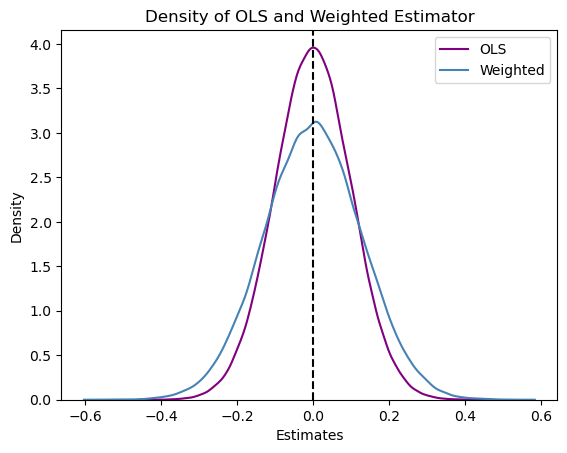

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set sample size and number of repetitions
n = 100
reps = int(1e5)

# choose epsilon and create a vector of weights as defined above
epsilon = 0.8
w = np.concatenate((np.repeat((1 + epsilon) / n, n // 2),
                    np.repeat((1 - epsilon) / n, n // 2)))

# draw a random sample y_1,...,y_n from the standard normal distribution,
# use both estimators 1e5 times and store the result in the vectors 'ols' and
# 'weightedestimator'

ols = np.empty(reps)
weightedestimator = np.empty(reps)

for i in range(reps):

  y = np.random.normal(size=n)
  ols[i] = np.mean(y)
  weightedestimator[i] = np.dot(w, y)

# plot kernel density estimates of the estimators' distributions:
sns.kdeplot(ols, color='purple', label='OLS')
sns.kdeplot(weightedestimator, color='steelblue', label='Weighted')

plt.axvline(0, color='black', linestyle='--')
plt.legend()
plt.xlabel('Estimates')
plt.title('Density of OLS and Weighted Estimator')
plt.show()




¿Qué conclusión podemos sacar del resultado?

- Ambos estimadores parecen no sesgados: las medias de sus distribuciones estimadas son cero.
- El estimador que utiliza ponderaciones que se desvían de las implícitas en OLS es menos eficiente que el estimador OLS: hay mayor dispersión cuando las ponderaciones son $w_i = \frac{1 \pm 0.8}{100}$ en lugar de $w_i=\frac{1}{100}$ como exige la solución OLS.

Por tanto, los resultados de la simulación corroboran el teorema de Gauss-Markov.

## Uso del estadístico t en regresión cuando el tamaño de la muestra es pequeño

Los tres supuestos OLS analizados anteriormente son la base de los resultados sobre la distribución en muestras grandes de los estimadores OLS en el modelo de regresión simple. ¿Qué puede decirse sobre la distribución de los estimadores y sus estadísticos $t$ cuando el tamaño de la muestra es pequeño y se desconoce la distribución poblacional de los datos? Siempre que se cumplan los tres supuestos de mínimos cuadrados y los errores se distribuyan normalmente y sean homoscedásticos (nos referimos a estas condiciones como los supuestos de regresión normal homoscedástica), tenemos estimadores distribuidos normalmente y estadísticos de prueba distribuidos $t$ en muestras pequeñas.

Recuerda el [definition](#thetdist) de una variable distribuida en $t$.

$$ \frac{Z}{\sqrt{W/M}} \sim t_M$$

donde $Z$ es una variable aleatoria normal estándar, $W$ se distribuye $\chi^2$ con $M$ grados de libertad y $Z$ y $W$ son independientes. Véase la sección 5.6 del libro para una discusión más detallada de la distribución de muestras pequeñas de los estadísticos $t$ en los métodos de regresión.

Simulemos la distribución de las estadísticas $t$ de regresión basándonos en un gran número de muestras aleatorias pequeñas, digamos $n=20$, y comparemos las distribuciones simuladas con las distribuciones teóricas, que deberían ser $t_{18}$, la distribución $t$ con $18$ grados de libertad (recordemos que $\text{DF}=n-k-1$).



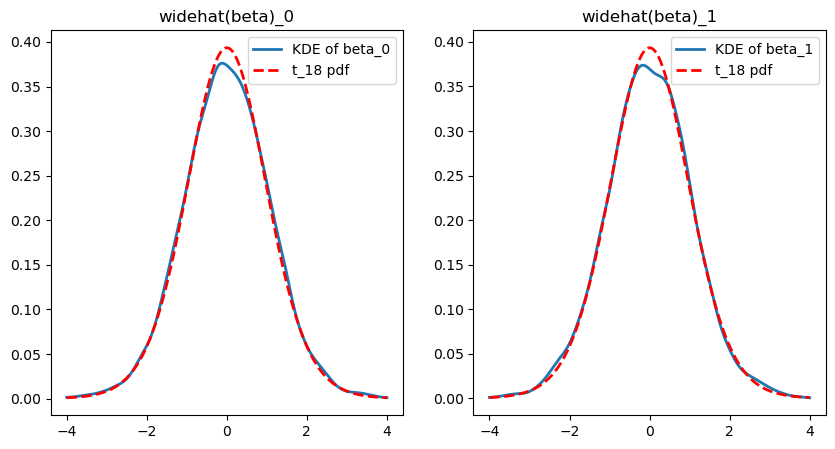

In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import t, gaussian_kde

# Initialize two lists
beta_0 = []
beta_1 = []

# Loop sampling / estimation / t statistics
for i in range(10000):
    X = np.random.uniform(low=0, high=20, size=20)
    X = sm.add_constant(X)  # Add constant to predictor matrix
    Y = np.random.normal(loc=X[:, 1], size=20)
    reg = sm.OLS(Y, X).fit()
    beta_0.append((reg.params[0] - 0) / reg.bse[0])
    beta_1.append((reg.params[1] - 1) / reg.bse[1])

# Plot the distributions and compare with t_18 density
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Kernel Density Estimation for beta_0
kde_beta_0 = gaussian_kde(beta_0)
x = np.linspace(-4, 4, 1000)
axs[0].plot(x, kde_beta_0(x), label='KDE of beta_0', linewidth=2)
axs[0].plot(x, t.pdf(x, df=18), label='t_18 pdf', color='red', linestyle='--', linewidth=2)
axs[0].set_title('widehat(beta)_0')
axs[0].legend()

# Kernel Density Estimation for beta_1
kde_beta_1 = gaussian_kde(beta_1)
axs[1].plot(x, kde_beta_1(x), label='KDE of beta_1', linewidth=2)
axs[1].plot(x, t.pdf(x, df=18), label='t_18 pdf', color='red', linestyle='--', linewidth=2)
axs[1].set_title('widehat(beta)_1')
axs[1].legend()

plt.show()




Los resultados son coherentes con nuestras expectativas: las distribuciones empíricas de ambos estimadores parecen seguir bastante de cerca la distribución teórica $t_{18}$.